# One variable linear regression 

### House prices example

In [2]:
import math,copy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [11]:
data = pd.read_csv('data/kc_house_data.csv')

To determine if the follwoing data set could be fitted into a straight line, we will generate a scatter plot.

In [12]:
data_set = data.head(10)[['price', 'sqft_living']]
data_set

,price,sqft_living
0,221900.0,1180
1,538000.0,2570
2,180000.0,770
3,604000.0,1960
4,510000.0,1680
5,1225000.0,5420
6,257500.0,1715
7,291850.0,1060
8,229500.0,1780
9,323000.0,1890


### Feature scaling

In [69]:
# extract data from the data set
x_train = np.array(data['sqft_living'].head(20)) #feature/input.
y_train = np.array(data['price'].head(20)) #target/output :  what we are trying to predict.


When the values of our feature are too large, we scale them by using a __normalization formula__.

In [70]:
x_train_scaled = x_train / x_train.max()
x_train_scaled

array([0.21771218, 0.47416974, 0.14206642, 0.36162362, 0.3099631 ,
       1.        , 0.31642066, 0.19557196, 0.32841328, 0.34870849,
       0.65682657, 0.21402214, 0.26383764, 0.25276753, 0.33394834,
       0.54428044, 0.34870849, 0.29520295, 0.22140221, 0.23062731])

In [71]:
y_train_scaled =y_train / y_train.max()
y_train_scaled

array([0.18114286, 0.43918367, 0.14693878, 0.49306122, 0.41632653,
       1.        , 0.21020408, 0.2382449 , 0.18734694, 0.26367347,
       0.54081633, 0.38204082, 0.25306122, 0.32653061, 0.43265306,
       0.53061224, 0.32244898, 0.39591837, 0.15428571, 0.1877551 ])

In [66]:
# Load our data set
x_tr = np.array([1.0, 2.0])   #features
y_tr = np.array([300.0, 500.0])   #target value

Scatter plot of the data set

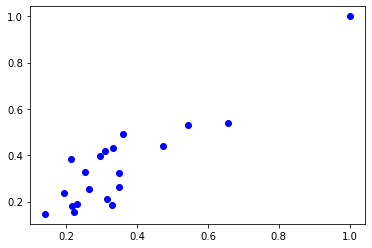

In [72]:
plt.scatter(x_train_scaled, y_train_scaled, c="blue")
plt.show()

### Calculating the total cost
For this we will need to define the cost function which will calculate the total cost between the predicted values by the linear model and the actual value.
reminder : the linear model is `f_wb = w*x + b`.

In [18]:
def cost_function(x_train, y_train, w, b):
    m = len(x_train)
    cost = 0
    for i in range(m):
        f_wb = w*x_train[i] + b
        square_func = (f_wb - y_train[i])**2
        cost += square_func
    j_wb = 1/(  2 *m)*cost
    return j_wb

In [19]:
print(cost_function(x_train,y_train,100,200))

38329825000.0


## Gradient descent implementation

It serves for the choice **w** and **b** by such **j_wb** is the minimum.

In [20]:
def compute_gradient(w,b,x,y):
    m = len(x)
    dj_dw = 0
    dj_db = 0
    for i in range(m):
        f_wb = w*x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_dw, dj_db

 Once the calculate gradient function is defined, it will used by the gradient descent algorithm to predict the correct values of **w** & **b**.

In [31]:
def gradient_descent_one(x, y, w_init,b_init,nb_iter,learning_rate, cost_func, gradient_func):
    m = len(x)
    b = b_init
    w = w_init
    cost_history = [] #saving the cost history for every pair of w, b
    w_history = []
    b_history = []
    for i in range (nb_iter):
        #calculate the gradient before 
        dj_dw, dj_db = gradient_func(w,b,x,y)
        
        #update w and b simultaneously 
        w = w - learning_rate * dj_dw
        b = b - learning_rate * dj_db
        
        #save the cost at every iteration along with its corresponding parameter values [w,b]
        cost_history.append(cost_func(x,y,w,b))
        w_history.append(w)
        
    return w,b,cost_history,w_history
        

In [73]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2

w, b, j_hist,w_hist = gradient_descent_one(x_train_scaled,y_train_scaled,w_init, b_init,iterations,tmp_alpha,cost_function, compute_gradient)
print(f"value of w={w} and b={b}")

value of w=0.8803879166224495 and b=0.04487157841765769


To see the difference we will plot the cost function J(w,b) at every iteration of the gradient descent, the learning rate **must** appear in decreasing direction.

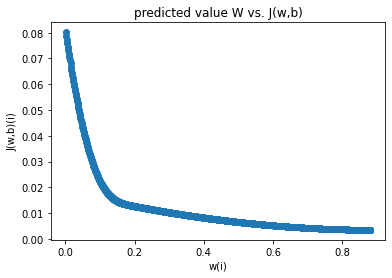

In [74]:
# Set the title
plt.title("predicted value W vs. J(w,b)")
plt.scatter(w_hist,j_hist)
# Set the y-axis label
plt.ylabel('J(w,b)(i)')
# Set the x-axis label
plt.xlabel('w(i)')
plt.show()

since we have predicted the parameter values of our model, now we plug then in and run our linear model.

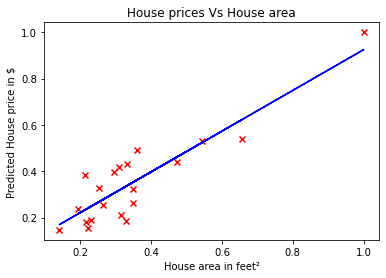

In [87]:
predict = []
m = x_train.shape[0]
for i in range(m):
    prediction = w * x_train_scaled[i] + b
    predict.append(prediction)
    
# Set the title

plt.plot(x_train_scaled,predict, c ='b')

# Create a scatter plot of the data. 
plt.scatter(x_train_scaled, y_train_scaled, marker='x', c='r') 
plt.title("House prices Vs House area")
# Set the y-axis label
plt.ylabel('Predicted House price in $')
# Set the x-axis label
plt.xlabel('House area in feet²')
plt.show()